# Exploratory Data Analysis and Data Visualization II


| Start Time | End Time | Length | Agenda                                       |
|------------|----------|--------|:---------------------------------------------|
| 10:00am    | 10:40am  | 40 min | Unit 1 - Introduction and Administration     |
| 11:00am    | 11:40am  | 40 min | Unit 2 - EDA and DataViz I                   |
| 11:40am    | 12:20pm  | 40 min | Lunch                                        |
| 12:20pm    | 12:50pm  | 30 min | **Unit 3 - EDA and DataViz II**              |
| 13:10pm    | 13:50pm  | 40 min | Unit 4 - Ingest and Basic Stats              |
| 14:10pm    | 14:50pm  | 40 min | Unit 5 - Finance in R                        |
| 14:50pm    | 15:00pm  | 10 min | Wrap-Up                                      |

# More `ggplot2`

## Additional Plot Types: Histograms

We have already seen density plots, let's also look at histograms which we create using `geom_hist`

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


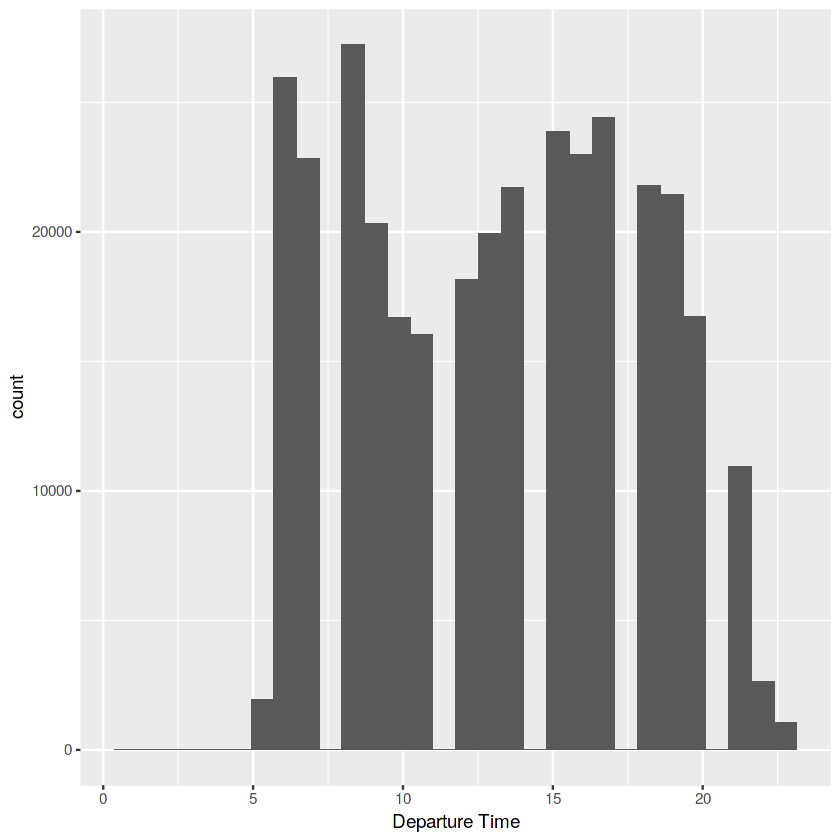

In [29]:
## Start by loading packages
library(ggplot2)
library(dplyr)
library(nycflights13)

ggplot(flights, aes(x=hour)) + geom_histogram() + xlab("Departure Time")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


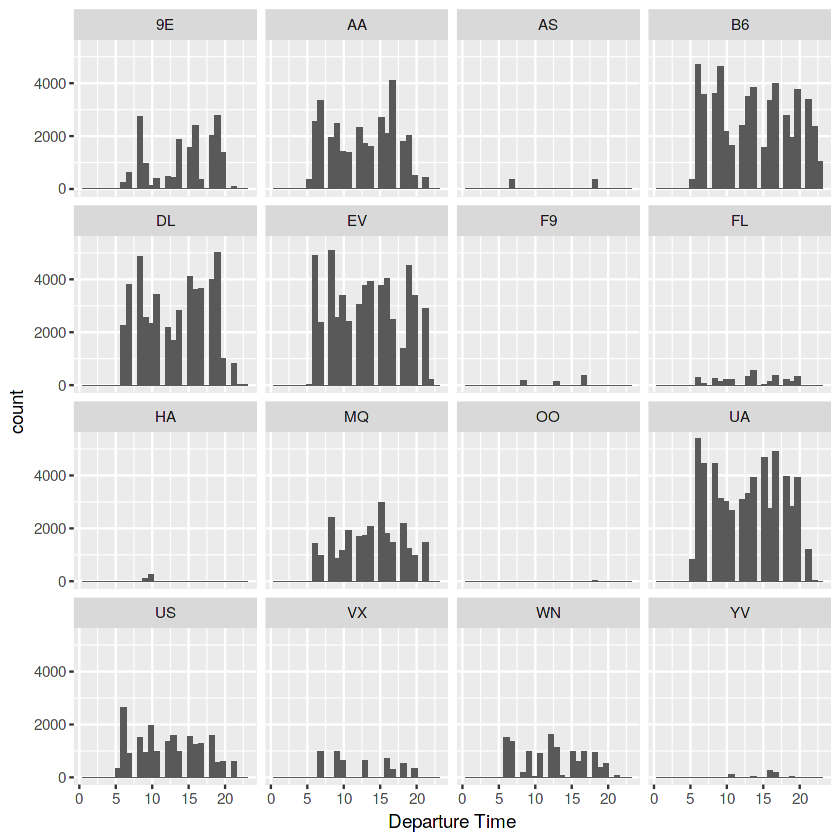

In [30]:
ggplot(flights, aes(x=hour)) + geom_histogram() + xlab("Departure Time") + facet_wrap(~carrier)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


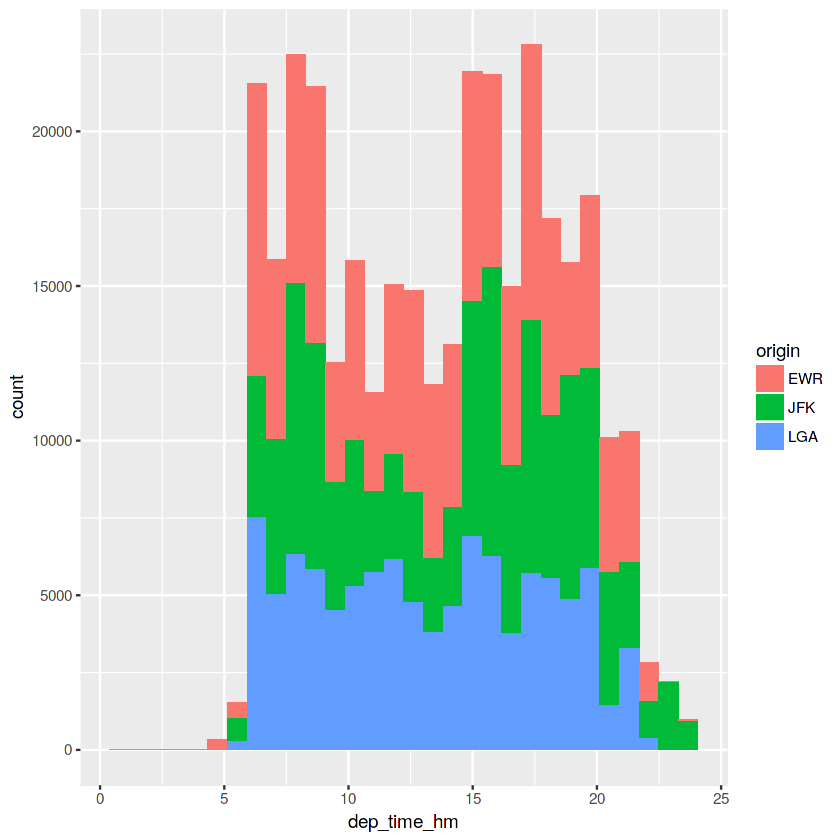

In [31]:
fdata <- flights %>% mutate(dep_time_hm = hour + minute / 60) 

ggplot(fdata, aes(x=dep_time_hm, fill=origin)) + geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


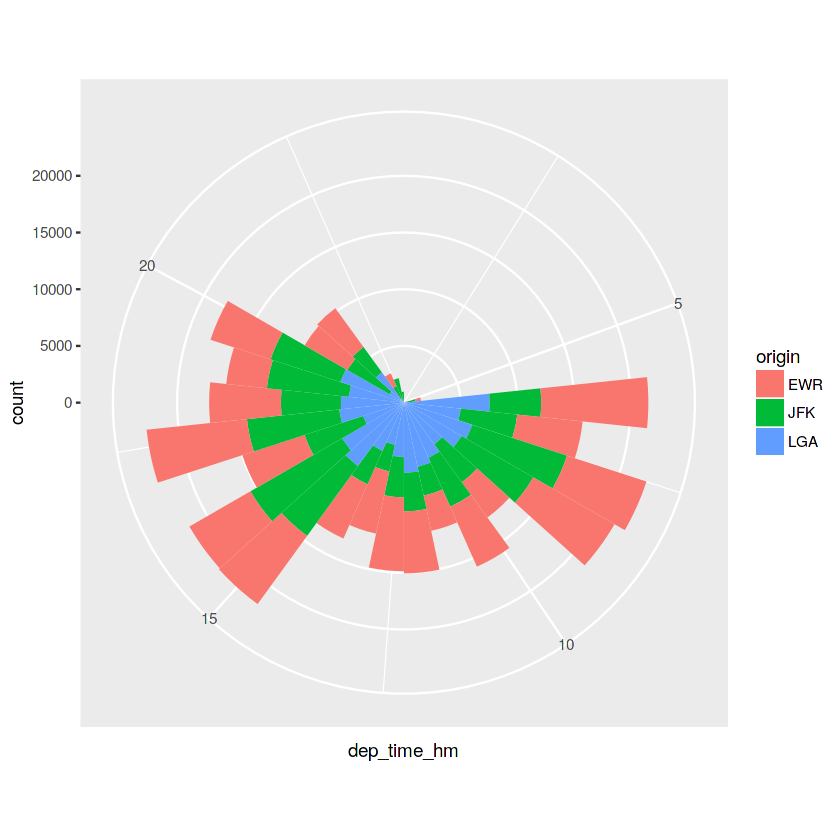

In [32]:
## Since this is time, let's plot it with polar coordinates
ggplot(fdata, aes(x =dep_time_hm, fill=origin)) + geom_histogram() + coord_polar()

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


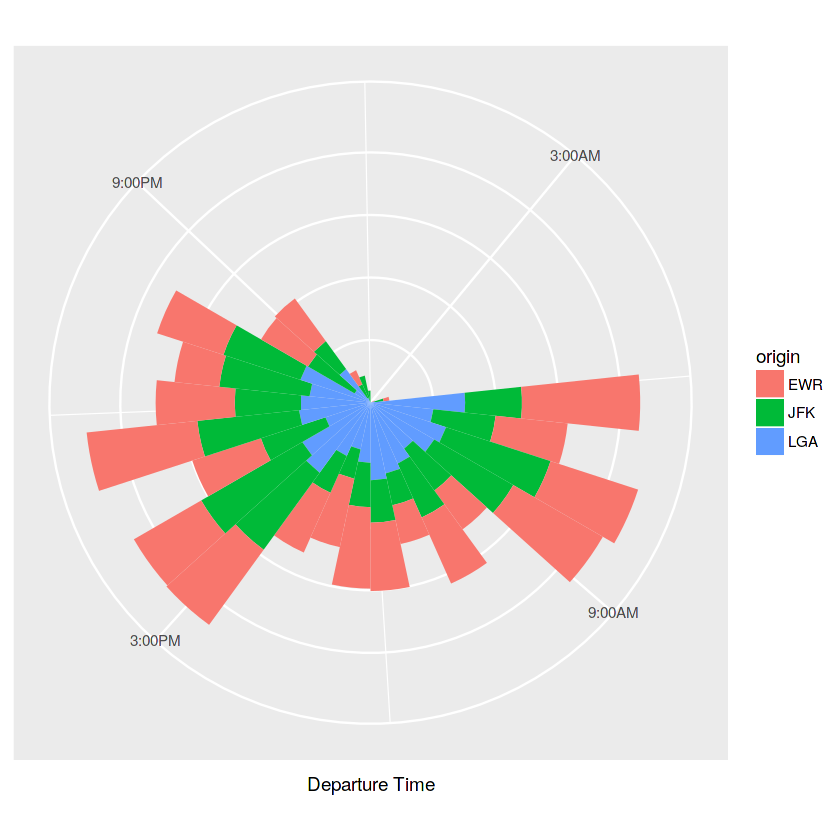

In [33]:
## Clean up the presentation a little
ggplot(fdata, aes(x=dep_time_hm, fill=origin)) + geom_histogram() + coord_polar() + 
    theme(axis.text.y=element_blank(), 
          axis.ticks.y=element_blank(), 
          axis.title.y=element_blank()) + 
    xlim(c(0, 24)) + xlab("Departure Time") + 
    scale_x_continuous(breaks = c(3, 9, 15, 21), labels=c("3:00AM", "9:00AM", "3:00PM", "9:00PM"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 9430 rows containing non-finite values (stat_bin).”

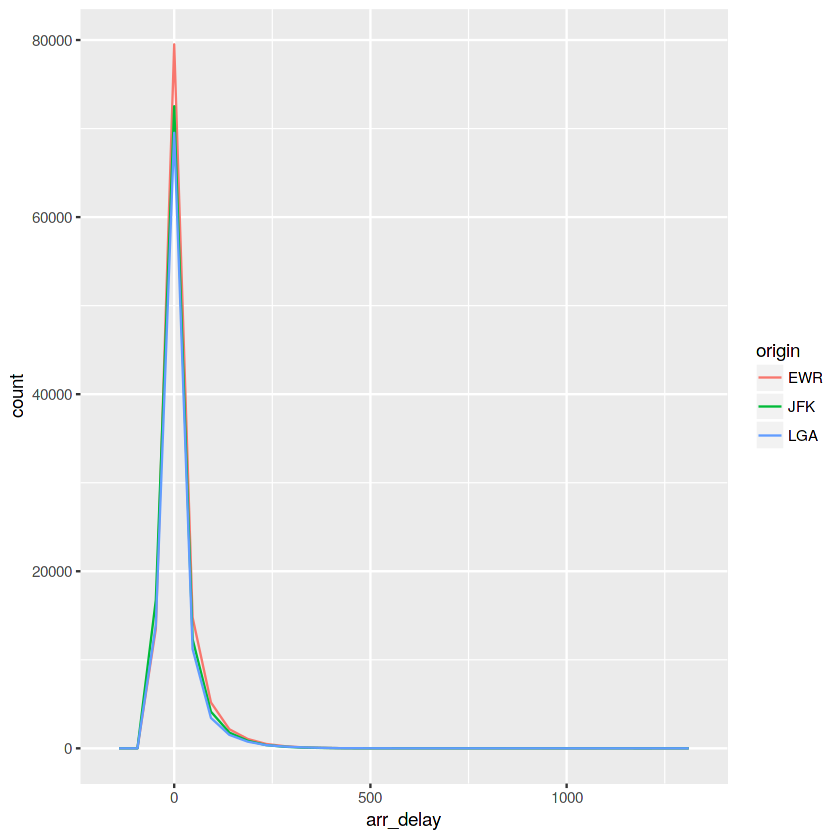

In [34]:
## Frequency polygons and densities are often better than histograms
ggplot(flights, aes(x=arr_delay, color=origin)) + geom_freqpoly()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 9430 rows containing non-finite values (stat_bin).”

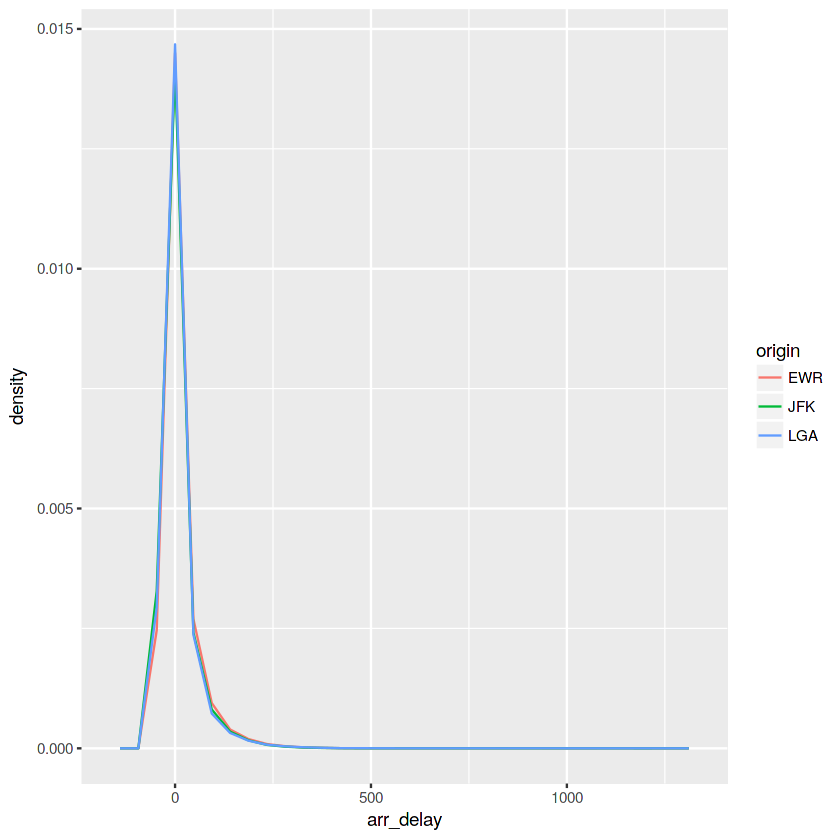

In [35]:
## `..density..` is a bit of magic to change to a probability-based scale for `y`
ggplot(flights, aes(x=arr_delay, ..density.., color=origin)) + geom_freqpoly()

Warning message:
“Removed 9430 rows containing non-finite values (stat_density).”

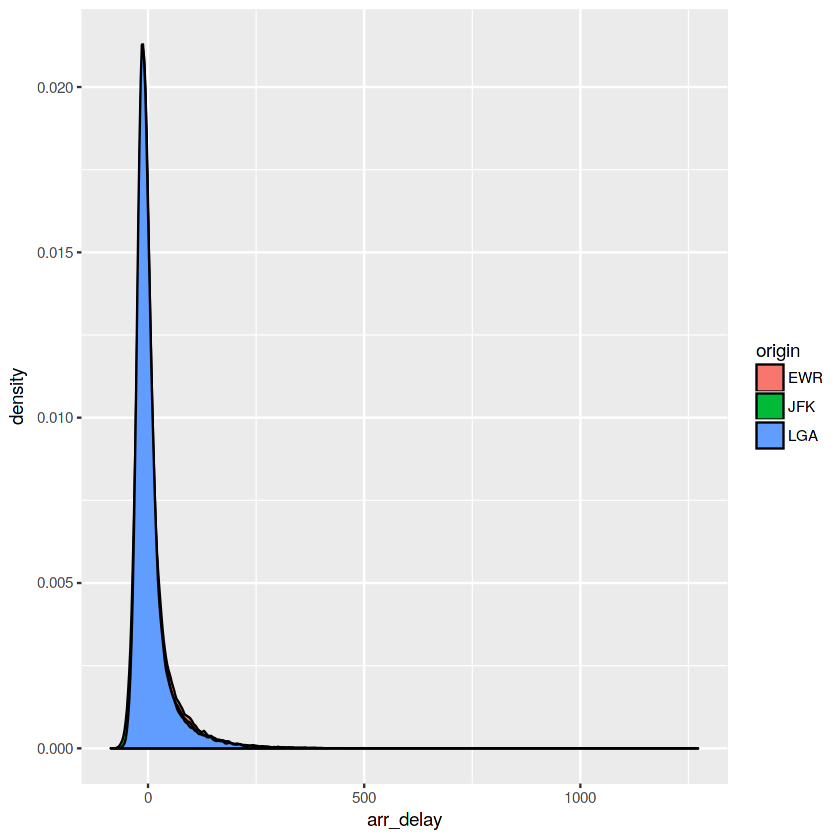

In [36]:
## Slightly less magical
ggplot(flights, aes(x=arr_delay, fill=origin)) + geom_density()

Warning message:
“Removed 9430 rows containing non-finite values (stat_density).”

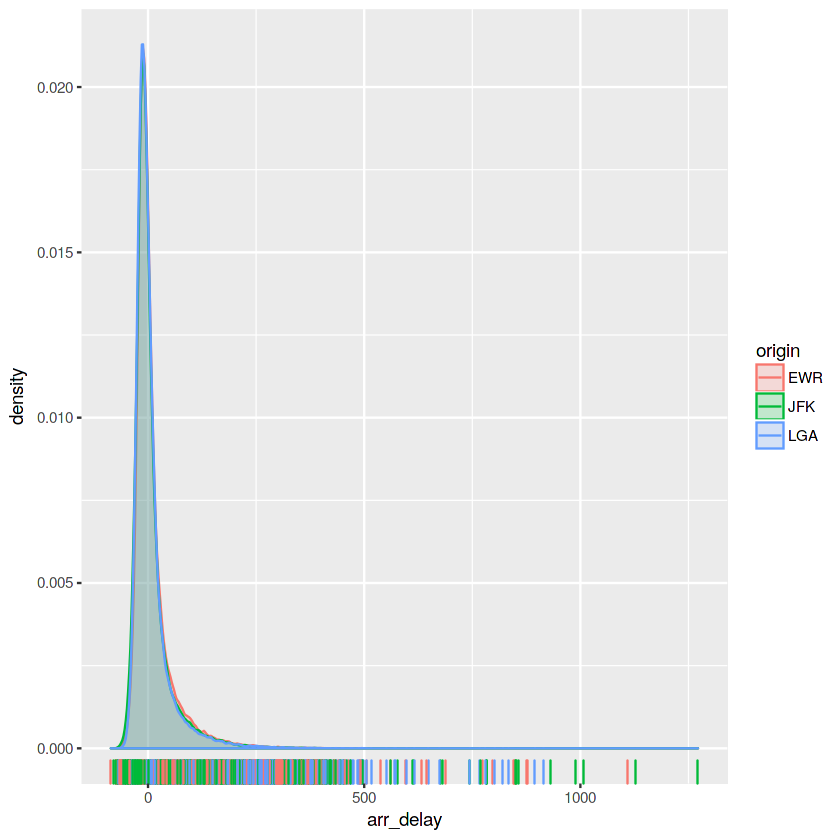

In [37]:
ggplot(flights, aes(x=arr_delay, fill=origin, color=origin)) + 
    geom_density(alpha=0.2) + ## New trick -- set an aesthetic to a fixed value (here alpha == transparency)
    geom_rug()

## Additional Plot Types: Box Plots

Warning message:
“Removed 9430 rows containing non-finite values (stat_boxplot).”

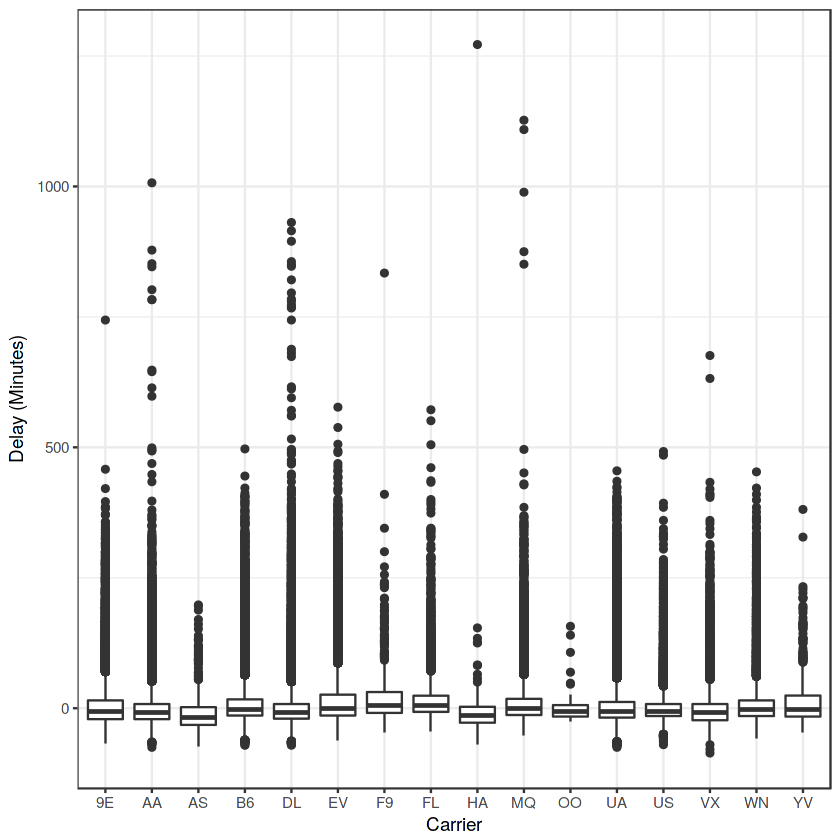

In [38]:
# Wants the data as `y` with separation by groups `x`
ggplot(flights, aes(x=carrier, y=arr_delay)) + 
    geom_boxplot() + xlab("Carrier") + ylab("Delay (Minutes)") + theme_bw()

Warning message:
“Removed 9430 rows containing non-finite values (stat_boxplot).”

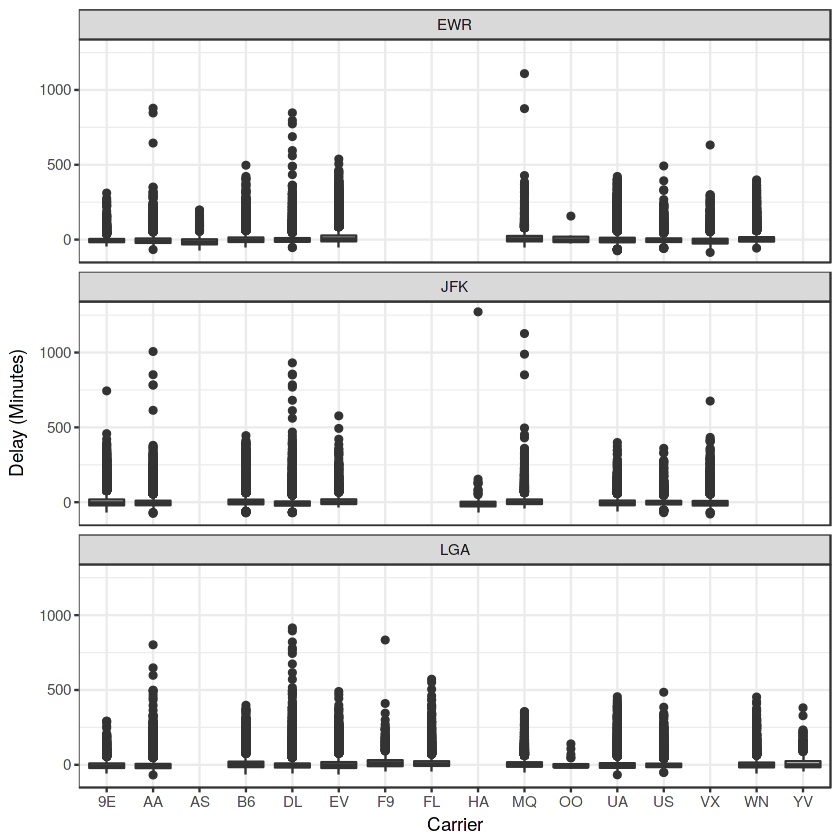

In [39]:
ggplot(flights, aes(x=carrier, y=arr_delay)) + 
    geom_boxplot() + xlab("Carrier") + ylab("Delay (Minutes)") + theme_bw() + 
    facet_wrap(~origin, ncol=1)

## Additional Plot Types: Violin Plots

Warning message:
“Removed 9430 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 9430 rows containing missing values (geom_point).”

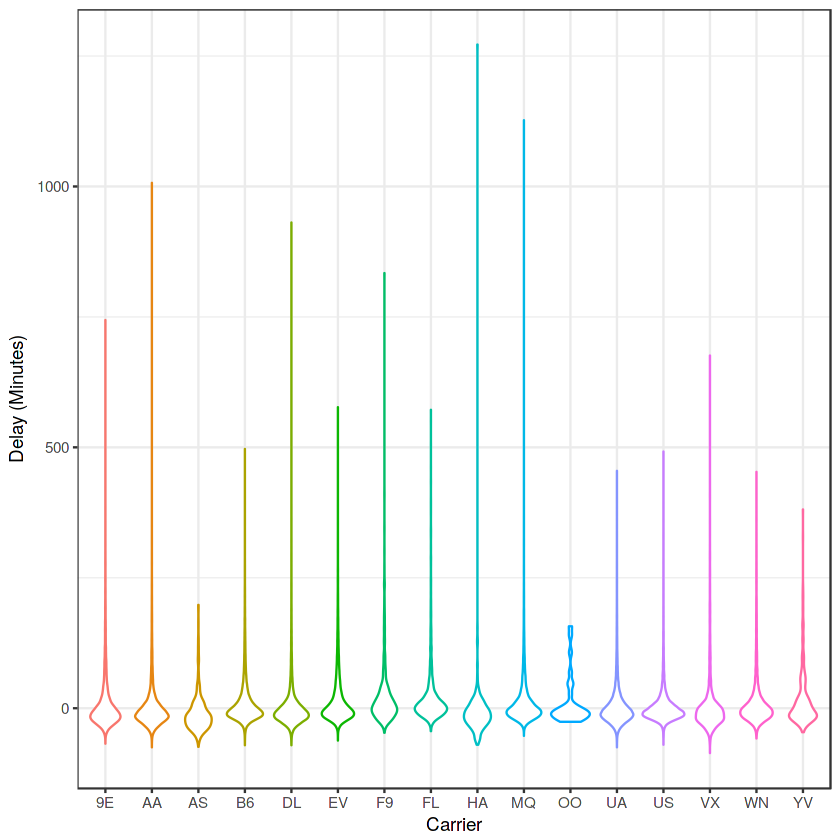

In [40]:
# Wants the data as `y` with separation by groups `x`
ggplot(flights, aes(x=carrier, y=arr_delay, color=carrier)) + 
    geom_violin() + geom_jitter(alpha=0.001) + xlab("Carrier") + ylab("Delay (Minutes)") + 
    theme_bw() + guides(color=FALSE)

Occasionally, we will want to plot multiple data sets in a single plot

We can make a geom with specific data by passing it a data argument

Let's add the outliers (flights with delays more than 2 hours) to the previous plot

Warning message:
“Removed 9430 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 9430 rows containing missing values (geom_point).”

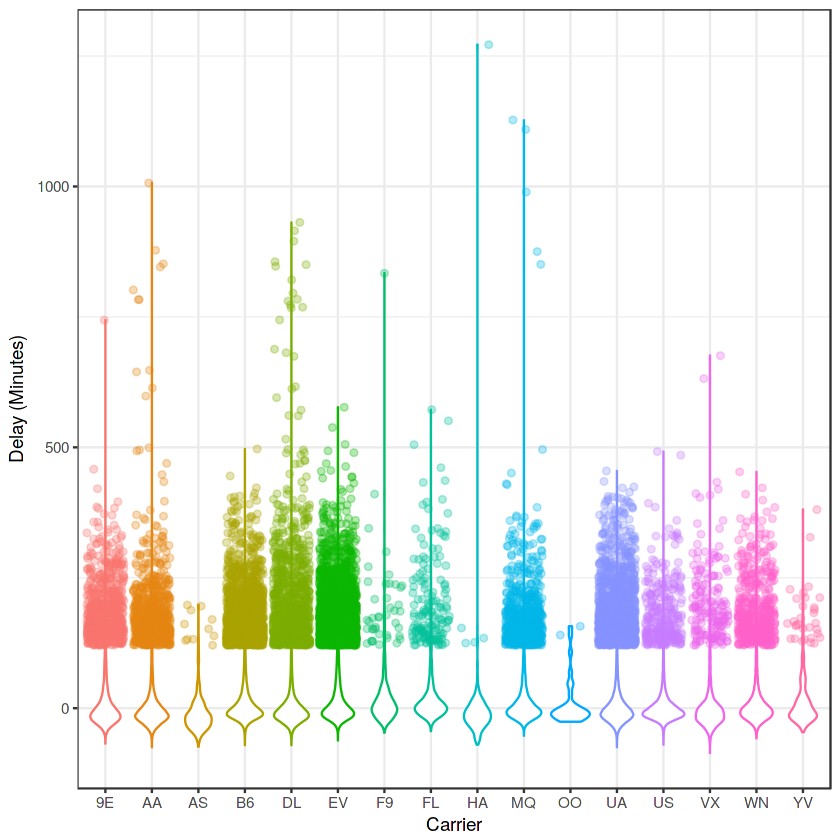

In [41]:
delayed_flights <- flights %>% filter(arr_delay > 120)

g <- ggplot(flights, aes(x=carrier, y=arr_delay, color=carrier)) + 
            geom_violin() + geom_jitter(alpha=0.001) + xlab("Carrier") + ylab("Delay (Minutes)") + 
            theme_bw() + guides(color=FALSE)

g <- g + geom_jitter(data=delayed_flights, alpha=0.3)

g

## Aside - Additional Plot Types: Time Series

So far, all of our time axes have been somewhat ugly because we haven't really used time or date objects properly

The `lubridate` package will be useful for work with dates

In [42]:
library(lubridate)

## We convert our dates to numbers of the form 20130620 (June 20 2013) and then use the ymd() function to convert
flights_date <- flights %>% mutate(date = ymd(10000 * year + 100 * month + day)) %>% select(-year, -month, -day)

In [ ]:
## Now our plots look better
g <- ggplot(flights_date, aes(x=date, y=arr_delay)) + geom_point()
g

Warning message:
“Removed 9430 rows containing missing values (geom_point).”

In [ ]:
## The scale_x_date() function has arguments to tweak formatting
g + scale_x_date(date_labels="%Y-%m")

In [ ]:
g + coord_polar() + scale_x_date(date_labels="%B")

# Joins: Combining Data from 2 Sources

Conceptually, joins work by creating a new table by combining two tables

The combinations are determined by one or more columns which should match values between the tables (keys)

The keys should always be unique identifiers: e.g., tickers for stock data (or even better - RICs)

## Types of Joins

![](https://pbs.twimg.com/media/B6eUTTACUAAahLf.png:large)

We will practice joining the flights data we've been using so far with other packages from the `nycflights13` package

In [ ]:
library(nycflights13)
data(package="nycflights13")

In [ ]:
airports

In [ ]:
airlines

In [ ]:
planes

### Which airline flew the most seats

- Conceptually: number of seats = (seats / plane * flights / plane) summed over planes for each airline

In [ ]:
library(dplyr)
flights_per_tail <- flights %>% filter(!is.na(tailnum)) %>%group_by(carrier, tailnum) %>% summarize(n = n())
flights_per_tail

In [ ]:
seats_per_tail <- planes %>% select(tailnum, seats)
seats_per_tail

In [ ]:
joined <- left_join(flights_per_tail, seats_per_tail, by="tailnum")
joined

In [ ]:
joined %>% mutate(total_seats = n * seats) %>% group_by(carrier) %>% 
           summarize(total_seats = sum(total_seats)) %>% arrange(total_seats)

Woops -- looks like there are some planes for which we don't have seat info

Let's just drop them for now by using a different join

In [ ]:
inner_join(flights_per_tail, seats_per_tail, by="tailnum") %>% 
    mutate(total_seats = n * seats) %>% group_by(carrier) %>% 
    summarize(total_seats = sum(total_seats)) %>% arrange(desc(total_seats))

In [ ]:
inner_join(flights_per_tail, seats_per_tail, by="tailnum") %>% 
    mutate(total_seats = n * seats) %>% group_by(carrier) %>% 
    summarize(total_seats = sum(total_seats)) %>% arrange(desc(total_seats)) %>%
    left_join(airlines, by="carrier") %>% select(-carrier) -> seat_count

print(seat_count)

library(ggplot2)
ggplot(seat_count, aes(x=name, y=total_seats)) + geom_point() + coord_flip() + 
   xlab("Carrier") + ylab("Seats") + ggtitle("Total Seat-Capacity Departing NYC Metro in 2013") + 
   theme_bw()

### Exercises

Answer one of these questions (or one of your own)

- Repeat the above analysis on a per origin basis
- Which airline has the highest average delay per seat
- Which airline has the longest flights on average
- Which airline flies the most between NYC and Houston

# Flight Delay Map

Recall this example from before:

In [ ]:
library(ggplot2)
library(nycflights13)
library(dplyr)
library(maps)
library(mapdata)

states <- map_data("state")

delays <- flights %>% group_by(year, month, dest, origin) %>%
                      filter(arr_delay > 0) %>%
                      summarize(median_delay = median(arr_delay),
                                n=n()) %>%
                      filter(!is.na(median_delay)) %>%
          inner_join(airports %>% select(faa, dest_lat=lat, dest_lon=lon),
                    by=c("dest"="faa")) %>%
          inner_join(airports %>% select(faa, origin_lat=lat, origin_lon=lon),
                    by=c("origin"="faa"))


ggplot(delays) +
    geom_segment(aes(x=origin_lon,
                     y=origin_lat,
                     xend=dest_lon,
                     yend=dest_lat,
                     lwd=n,
                     color=median_delay)) +
    scale_color_gradient(low="white", high="red") +
    geom_polygon(data=states,
                 aes(x=long, y=lat, group=group),
                 fill="green4",
                 alpha=0.2,
                 color = "white") +
    guides(fill=FALSE,
           alpha=FALSE,
           lwd=FALSE,
           color=guide_legend(title="Median Delay (min)",
                              breaks=c(15, 30, 60, 120))) +
    xlab("Longitude") + ylab("Latitude") +
    coord_fixed(xlim=range(states$long),
                ylim=range(states$lat), ratio=1.3) +
    ggtitle("Average Flight Delay Leaving NYC by Route") +
    theme_bw() + theme(legend.position="bottom") 

Do you understand every part of it? 

Discuss with your neighbors

Can you change the color of the states? 

Can you change the legend? 